In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# Задание 1. 
#Загрузите в библиотеку Pandas DataFrame из CSV-файла исходные данные о покупателях с веб-портала (все строки). При необходимости преобразуйте данные.

df = pd.read_csv('web_clients_correct.csv', sep=',')
df['region'] = df['region'].replace('-', None)
df

,name,device_type,browser,sex,age,bill,region
0,Allen Miss. Elisabeth Walton,mobile,Chrome,female,29.0,885.0,St Louis: MO
1,Allison Master. Hudson Trevor,tablet,Opera,male,48.0,850.0,Montreal: PQ / Chesterville: ON
2,Allison Miss. Helen Loraine,laptop,Firefox,female,48.0,1034.0,Montreal: PQ / Chesterville: ON
3,Allison Mr. Hudson Joshua Creighton,desktop,Internet Explorer,male,30.0,214.0,Montreal: PQ / Chesterville: ON
4,Allison Mrs. Hudson J C (Bessie Waldo Daniels),laptop,Firefox,female,25.0,993.0,Montreal: PQ / Chesterville: ON
...,...,...,...,...,...,...,...
910,Kallio Mr. Nikolai Erland,tablet,Opera,male,17.0,1273.0,NaN
911,Kalvik Mr. Johannes Halvorsen,mobile,Opera,male,21.0,1136.0,NaN
912,Karaic Mr. Milan,desktop,Opera,male,30.0,465.0,NaN
913,Karlsson Mr. Einar Gervasius,desktop,Internet Explorer,male,21.0,275.0,NaN


In [11]:
# стандартизация данных региона
df['region'] = df['region'].str.split('/').str[0]
df['region'] = df['region'].str.split(':').str[0]
df['region'].unique()

array(['St Louis', 'Montreal', 'New York', 'Hudson', 'Belfast', 'Bayside',
       'Montevideo', 'Paris', nan, 'Hessle', 'Winnipeg', 'San Francisco',
       'Dowagiac', 'Stockholm', 'Trenton', 'Glen Ridge', 'Youngstown',
       'Birkdale', 'London ', 'Cooperstown', 'St Leonards-on-Sea',
       'Pomeroy', 'Omaha', 'Philadelphia', 'Denver', 'Belmont',
       'Washington', 'Austria-Hungary ', 'Germantown', 'Bryn Mawr',
       'Ascot', 'Little Onn Hall', 'Amenia', 'London', 'Liverpool',
       'Los Angeles', 'Stoughton', 'Victoria', 'Lakewood', 'Roachdale',
       'Milwaukee', 'Lima', 'Calgary', 'Deephaven', 'Mt Airy',
       'Brookline', 'Westcliff-on-Sea', 'Zurich', 'Scituate',
       "St Anne's-on-Sea", 'Greenwich', 'Brooklyn', 'Kingston',
       'Brighton', 'Chicago', 'Bennington', 'Buffalo', 'Southington ',
       'Boston', 'Portland', 'Springfield', 'Brockton', 'Vancouver',
       'Dorchester', 'East Bridgewater', 'Fond du Lac', 'Green Bay',
       'Lexington', 'Isle of Wight', 'Provi

In [13]:
#Задание 2. Выполните анализ используемых браузеров, устройств, пола, региона, сумм покупки. Сформируйте сводные таблицы с указанием min, max, avg, median по суммам покупки. Чтобы выполнить задание, нужно использовать библиотеку Pandas.

# Группировка данных по типам устройств 
tbl_1 = pd.pivot_table(df, index='device_type', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_1[('avg', 'bill')] = (tbl_1[('sum', 'bill')] / tbl_1[('count', 'bill')]).round(2)
tbl_1

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
device_type,,,,,,
desktop,34.0,1473.0,796.0,166262.0,211,787.97
laptop,42.0,1477.0,817.0,166412.0,208,800.06
mobile,45.0,1497.0,735.0,165242.0,223,741.00
tablet,33.0,1500.0,762.0,174730.0,225,776.58


In [15]:
# группировка по браузеру

tbl_2 = pd.pivot_table(df, index='browser', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_2[('avg', 'bill')] = (tbl_2[('sum', 'bill')] / tbl_2[('count', 'bill')]).round(2)
tbl_2

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
browser,,,,,,
Chrome,45.0,1500.0,757.0,223460.0,290,770.55
Firefox,33.0,1496.0,812.5,224677.0,280,802.42
Internet Explorer,60.0,1477.0,683.0,94974.0,133,714.09
Opera,35.0,1493.0,840.0,129535.0,164,789.85


In [16]:
# Группировка по полу

tbl_3 = pd.pivot_table(df, index='sex', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_3[('avg', 'bill')] = (tbl_3[('sum', 'bill')] / tbl_3[('count', 'bill')]).round(2)
tbl_3

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
sex,,,,,,
female,33.0,1500.0,767.0,244236.0,317,770.46
male,34.0,1497.0,790.0,428410.0,550,778.93


In [17]:
# группировка по региону

tbl_4 = pd.pivot_table(df, index='region', values='bill', aggfunc=['min', 'max', 'median', 'sum', 'count'])
tbl_4[('avg', 'bill')] = (tbl_4[('sum', 'bill')] / tbl_4[('count', 'bill')]).round(2)
tbl_4

,min,max,median,sum,count,avg
,bill,bill,bill,bill,bill,bill
region,,,,,,
?Havana,141.0,141.0,141.0,141.0,1,141.00
Aberdeen,232.0,232.0,232.0,232.0,1,232.00
Albany,1278.0,1278.0,1278.0,1278.0,1,1278.00
Altdorf,995.0,1441.0,1218.0,2436.0,2,1218.00
Amenia,1044.0,1330.0,1187.0,2374.0,2,1187.00
...,...,...,...,...,...,...
Woodford County,1217.0,1217.0,1217.0,1217.0,1,1217.00
Worcester,223.0,1262.0,742.5,1485.0,2,742.50


In [21]:
# Задание 3
# характеристика чеков

df['bill'].describe()


count     867.000000
mean      775.831603
std       412.393220
min        33.000000
25%       423.500000
50%       777.000000
75%      1140.500000
max      1500.000000
Name: bill, dtype: float64

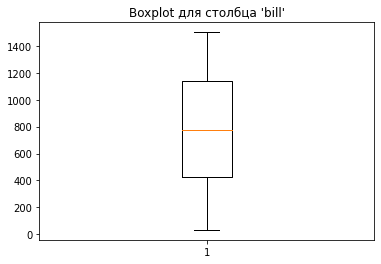

In [24]:
#проверка на выбросы

plt.boxplot(df['bill'].dropna())
plt.title("Boxplot для столбца 'bill'")
plt.show()

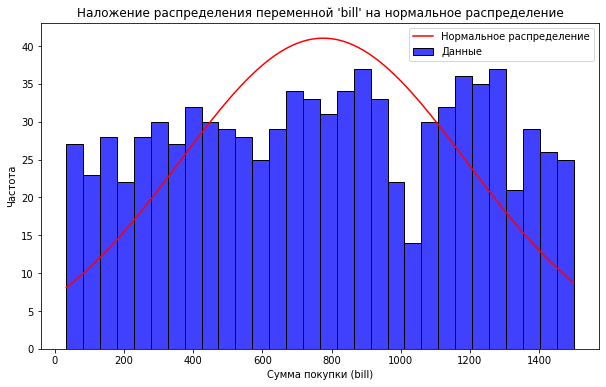

In [25]:
# Построение гистограммы для количественной переменной "bill"
plt.figure(figsize=(10, 6))
sns.histplot(df['bill'].dropna(), kde=False, bins=30, color='blue', label='Данные')

# Наложение нормального распределения
mean, std = np.mean(df['bill'].dropna()), np.std(df['bill'].dropna())
x = np.linspace(min(df['bill'].dropna()), max(df['bill'].dropna()), 100)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf * len(df['bill'].dropna()) * (max(df['bill']) - min(df['bill'])) / 30, 
         color='red', label='Нормальное распределение')

plt.title("Наложение распределения переменной 'bill' на нормальное распределение")
plt.xlabel("Сумма покупки (bill)")
plt.ylabel("Частота")
plt.legend()
plt.show()